In [61]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers

In [69]:
# import modules I've written
try:
    reload(m)
    from src.models import *
except:
    import src.models as m
    from src.models import *
    print('reload failed')
try:
    reload(d)
    from src.dataMethods import *
except:
    import src.dataMethods as d
    from src.dataMethods import *
    print('reload failed')


In [3]:
# get data frame with variables of interest
df_gesture = CSV2VoI('data/recordings/so-so.csv')
df_nogesture = CSV2VoI('data/recordings/no-gesture.csv')

mean fps: 110.39
skipping every 4 frames
Found left hand data:  False
Found right hand data:  True
mean fps: 115.21
skipping every 5 frames
Found left hand data:  True
Found right hand data:  True


In [49]:
# extract X and y
# note that this way I'm normalizing true and false examples separately...
X1, _, = df2X_y(df_gesture)
X0, _ = df2X_y(df_nogesture)
X1.shape
X0.shape

dropped 0 of 3953 rows with nans
right_index_tipPosition_0    -3.719150
right_index_tipPosition_1    -2.981039
right_index_tipPosition_2    -2.416370
right_middle_tipPosition_0   -3.916131
right_middle_tipPosition_1   -2.972461
right_middle_tipPosition_2   -2.298196
right_ring_tipPosition_0     -3.910930
right_ring_tipPosition_1     -2.810008
right_ring_tipPosition_2     -2.323741
right_pinky_tipPosition_0    -4.113620
right_pinky_tipPosition_1    -2.761090
right_pinky_tipPosition_2    -2.513671
right_thumb_tipPosition_0    -4.297826
right_thumb_tipPosition_1    -2.765957
right_thumb_tipPosition_2    -2.545743
right_palmVelocity_0         -4.460913
right_palmVelocity_1         -3.377157
right_palmVelocity_2         -8.874610
right_pinchDistance          -5.024859
right_grabAngle              -2.553843
right_direction_0            -3.704464
dtype: float64 right_index_tipPosition_0     2.643953
right_index_tipPosition_1     4.483316
right_index_tipPosition_2     4.141127
right_middle_tip

(4038, 21)

In [50]:
n_frames = 30
# separate into examples 30 frames long each
X1 = np.array(split2examples(X1, n_frames))
X0 = np.array(split2examples(X0, n_frames))
print(X1.shape)
print(X0.shape)

(131, 30, 21)
(134, 30, 21)


In [51]:
# get y labels
y1 = np.array([1 for i in X1])
y0 = np.array([0 for i in X0])
print(y1[:5])
print(y0[:5])

[1 1 1 1 1]
[0 0 0 0 0]


In [52]:
X = np.concatenate((X1, X0))
y = np.concatenate((y1, y0))
y_rigged = np.array([0 for i in X])
# for random shuffling like this, see:
# https://stackoverflow.com/questions/4601373/better-way-to-shuffle-two-numpy-arrays-in-unison
state = np.random.get_state()
np.random.shuffle(X)
np.random.set_state(state)
np.random.shuffle(y)

X.shape

(265, 30, 21)

In [44]:
# just get some completely rigged data... X rigged as well.
Xy = np.array([1 for i in range(100)] + [0 for i in range(100)])
X = np.reshape(Xy, (200,1,1))
y = np.reshape(Xy, (200,1))
print(X.shape[-1])

1


In [82]:
model = many2one_model(n_features = X.shape[-1], n_frames=X.shape[1], n_gestures=2, rnn_units=1)

Model: "many2one"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 30, 21)]          0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 1)                 92        
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 4         
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


In [83]:
opt = tf.keras.optimizers.Adam()
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X, y, epochs=150, batch_size = 32, validation_split=0.1)

Train on 238 samples, validate on 27 samples
Epoch 1/150
238/238 [==============================] - 2s 10ms/sample - loss: 0.7190 - accuracy: 0.4790 - val_loss: 0.7040 - val_accuracy: 0.4815
Epoch 2/150
238/238 [==============================] - 0s 365us/sample - loss: 0.7112 - accuracy: 0.4748 - val_loss: 0.6971 - val_accuracy: 0.4815
Epoch 3/150
238/238 [==============================] - 0s 406us/sample - loss: 0.7046 - accuracy: 0.4916 - val_loss: 0.6907 - val_accuracy: 0.5185
Epoch 4/150
238/238 [==============================] - 0s 383us/sample - loss: 0.6988 - accuracy: 0.5042 - val_loss: 0.6848 - val_accuracy: 0.5185
Epoch 5/150
238/238 [==============================] - 0s 335us/sample - loss: 0.6926 - accuracy: 0.5210 - val_loss: 0.6817 - val_accuracy: 0.5556
Epoch 6/150
238/238 [==============================] - 0s 366us/sample - loss: 0.6874 - accuracy: 0.5294 - val_loss: 0.6798 - val_accuracy: 0.5185
Epoch 7/150
238/238 [==============================] - 0s 362us/sample - l

238/238 [==============================] - 0s 352us/sample - loss: 0.4639 - accuracy: 0.7605 - val_loss: 0.4222 - val_accuracy: 0.8148
Epoch 57/150
238/238 [==============================] - 0s 318us/sample - loss: 0.4593 - accuracy: 0.7647 - val_loss: 0.4144 - val_accuracy: 0.8148
Epoch 58/150
238/238 [==============================] - 0s 317us/sample - loss: 0.4554 - accuracy: 0.7689 - val_loss: 0.4067 - val_accuracy: 0.8148
Epoch 59/150
238/238 [==============================] - 0s 306us/sample - loss: 0.4518 - accuracy: 0.7689 - val_loss: 0.4015 - val_accuracy: 0.8519
Epoch 60/150
238/238 [==============================] - 0s 302us/sample - loss: 0.4483 - accuracy: 0.7647 - val_loss: 0.3942 - val_accuracy: 0.8889
Epoch 61/150
238/238 [==============================] - 0s 318us/sample - loss: 0.4446 - accuracy: 0.7731 - val_loss: 0.3892 - val_accuracy: 0.8889
Epoch 62/150
238/238 [==============================] - 0s 314us/sample - loss: 0.4416 - accuracy: 0.7773 - val_loss: 0.3884 

238/238 [==============================] - 0s 332us/sample - loss: 0.3480 - accuracy: 0.8361 - val_loss: 0.2480 - val_accuracy: 0.9630
Epoch 112/150
238/238 [==============================] - 0s 338us/sample - loss: 0.3470 - accuracy: 0.8361 - val_loss: 0.2471 - val_accuracy: 0.9630
Epoch 113/150
238/238 [==============================] - 0s 322us/sample - loss: 0.3459 - accuracy: 0.8361 - val_loss: 0.2459 - val_accuracy: 0.9630
Epoch 114/150
238/238 [==============================] - 0s 332us/sample - loss: 0.3449 - accuracy: 0.8403 - val_loss: 0.2451 - val_accuracy: 0.9630
Epoch 115/150
238/238 [==============================] - 0s 332us/sample - loss: 0.3438 - accuracy: 0.8403 - val_loss: 0.2442 - val_accuracy: 0.9630
Epoch 116/150
238/238 [==============================] - 0s 313us/sample - loss: 0.3429 - accuracy: 0.8403 - val_loss: 0.2432 - val_accuracy: 0.9630
Epoch 117/150
238/238 [==============================] - 0s 322us/sample - loss: 0.3418 - accuracy: 0.8445 - val_loss: 0

In [58]:
model.predict(np.array([X[200]]))

array([[0.42660975, 0.5733902 ]], dtype=float32)

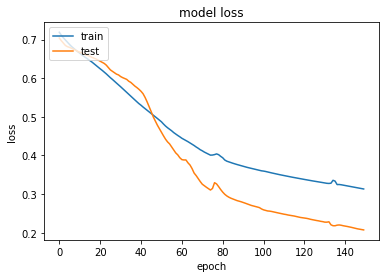

In [84]:
# plot history:
## summarize history for loss, from https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

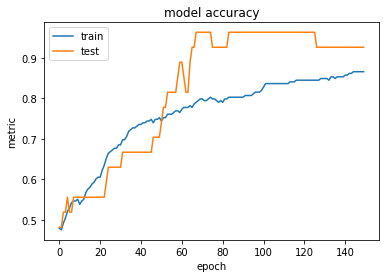

In [85]:
plt_metric(history, 'accuracy')